Import Libraries

In [256]:
import pandas as pd
import seaborn as sns
import numpy as np
import timeit
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning


Read Data

In [136]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Data Analysis

In [137]:
df.shape

(41188, 21)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [139]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Missing Values

In [140]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

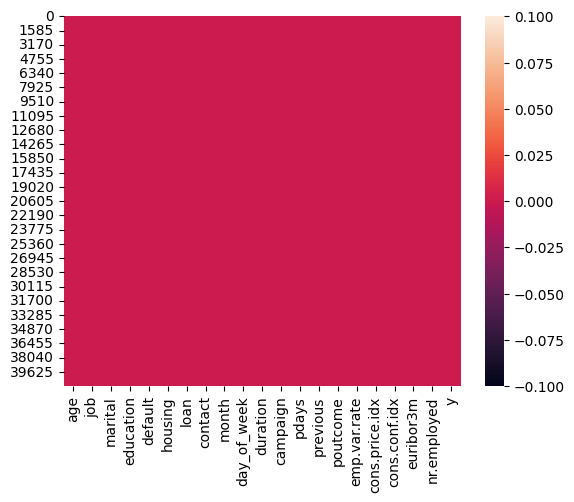

In [281]:
sns.heatmap(df.isnull())
plt.savefig("/Users/nandapop/Documents/Bootcamp/Logistic Regression/machine-learning-python-template/data/heatmap_null_values.png")

Numerical features

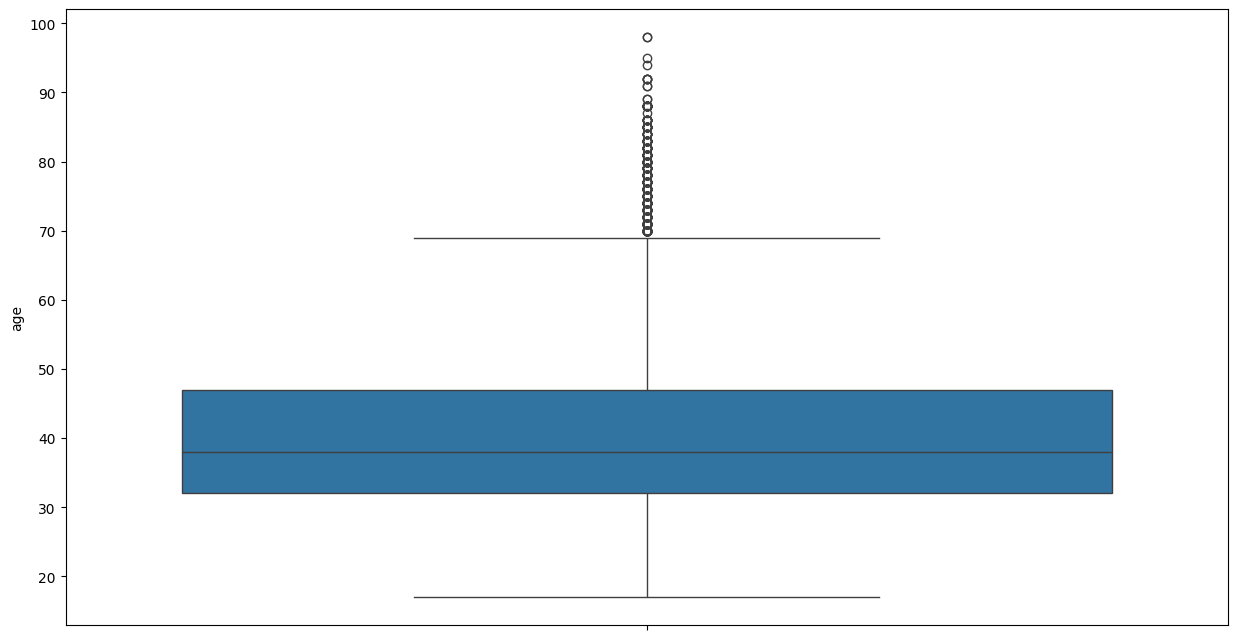

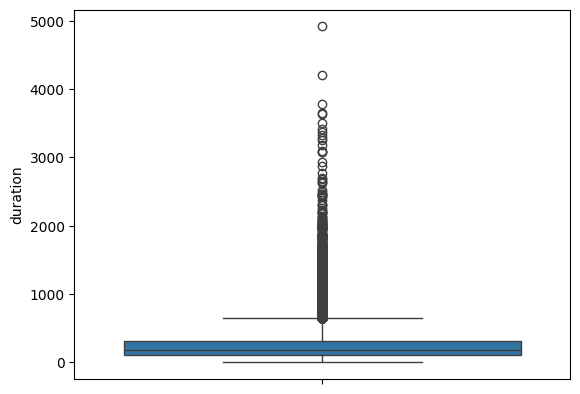

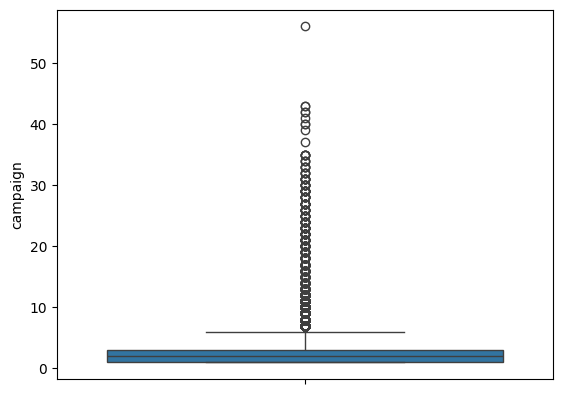

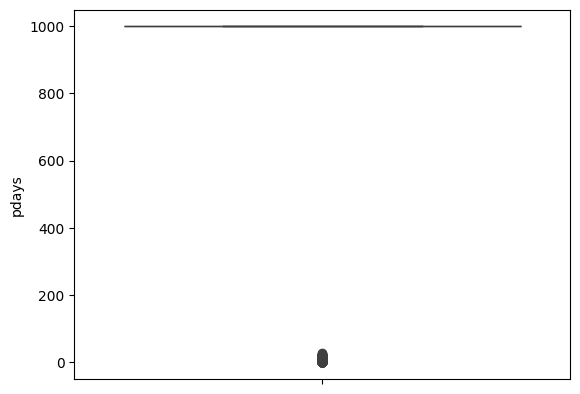

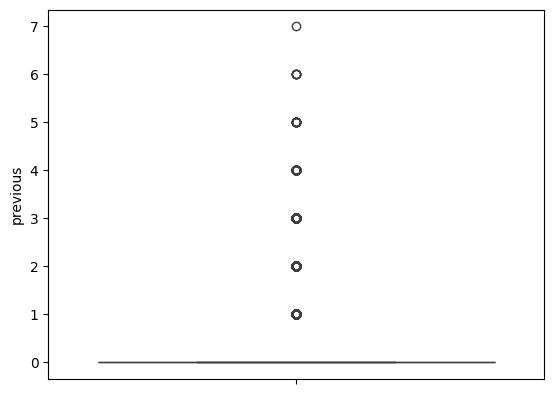

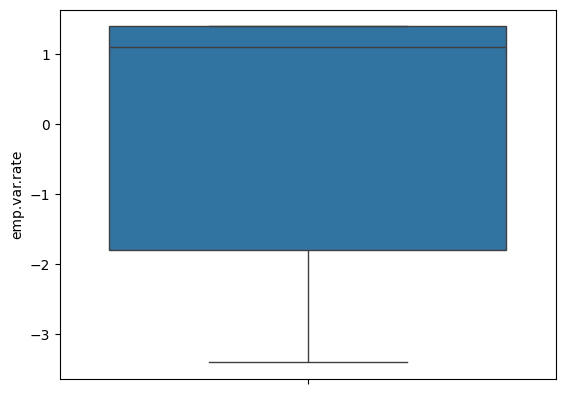

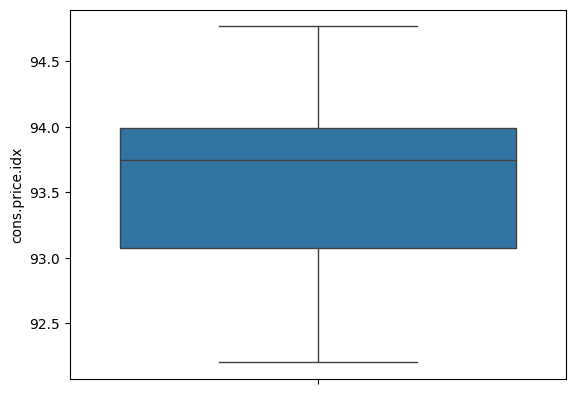

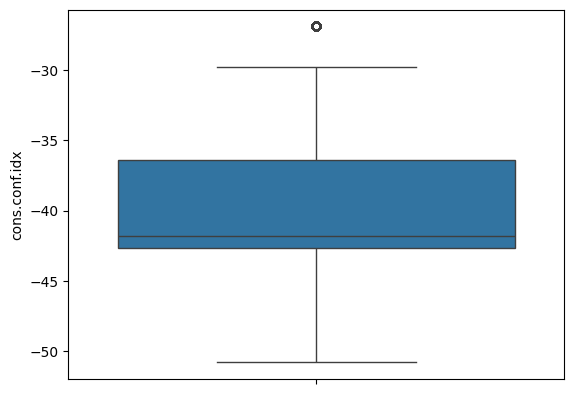

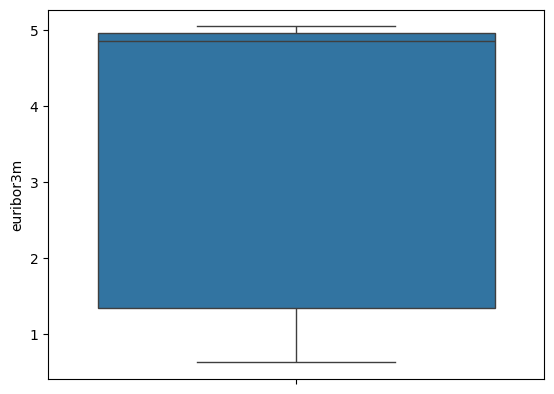

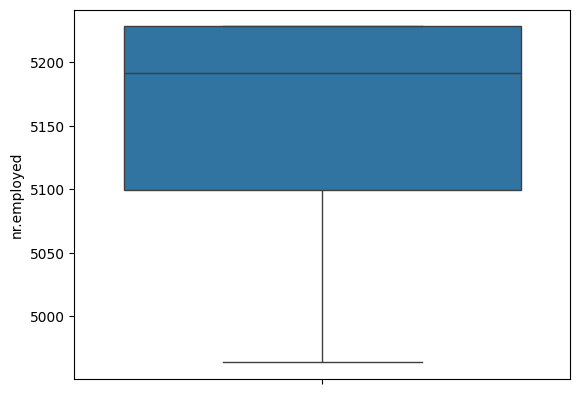

In [282]:
df_numerical = df.select_dtypes(include=np.number)
plt.figure(figsize=(15,8))
for col in df_numerical:
    sns.boxplot(data = df_numerical, y= df[col])
    plt.savefig(f"/Users/nandapop/Documents/Bootcamp/Logistic Regression/machine-learning-python-template/data/data_num_{col}.png")
    plt.show()

Correlation Numerical Values

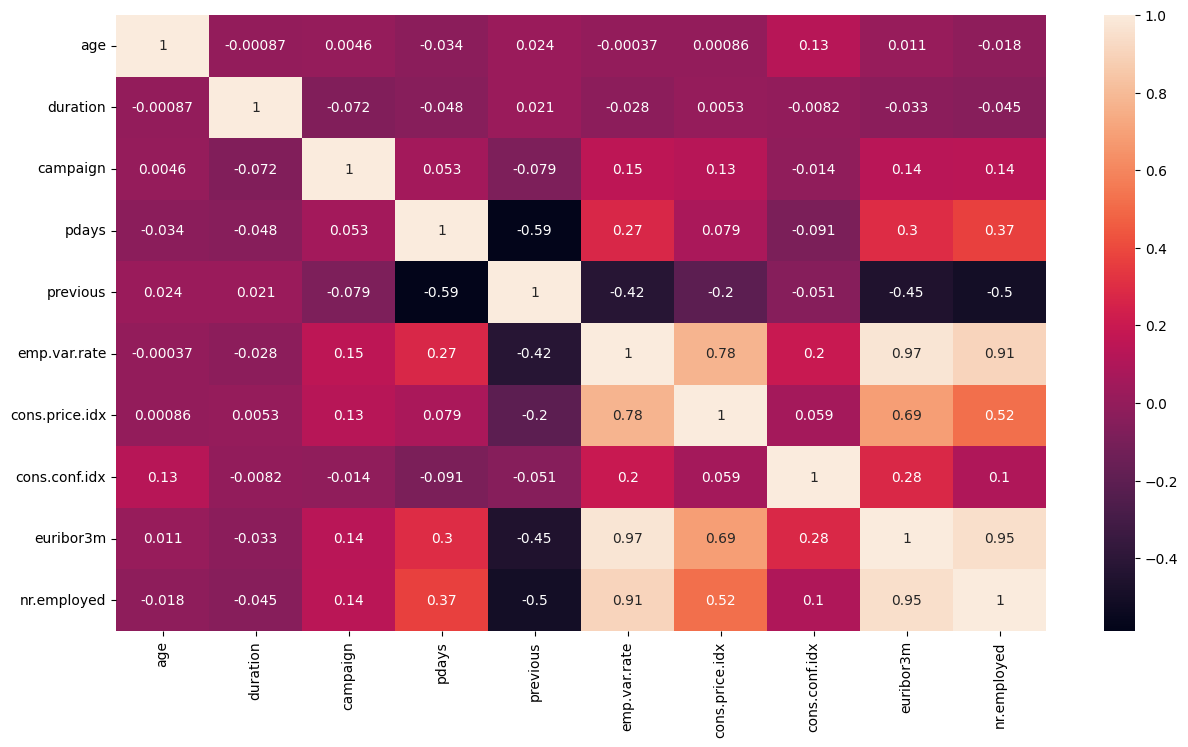

In [279]:
numerical_values = df.select_dtypes(include=[np.number]) 
corr_matrix = numerical_values.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True)
plt.savefig("/Users/nandapop/Documents/Bootcamp/Logistic Regression/machine-learning-python-template/data/corr_num_values.png")

Categorical features

Label encoding

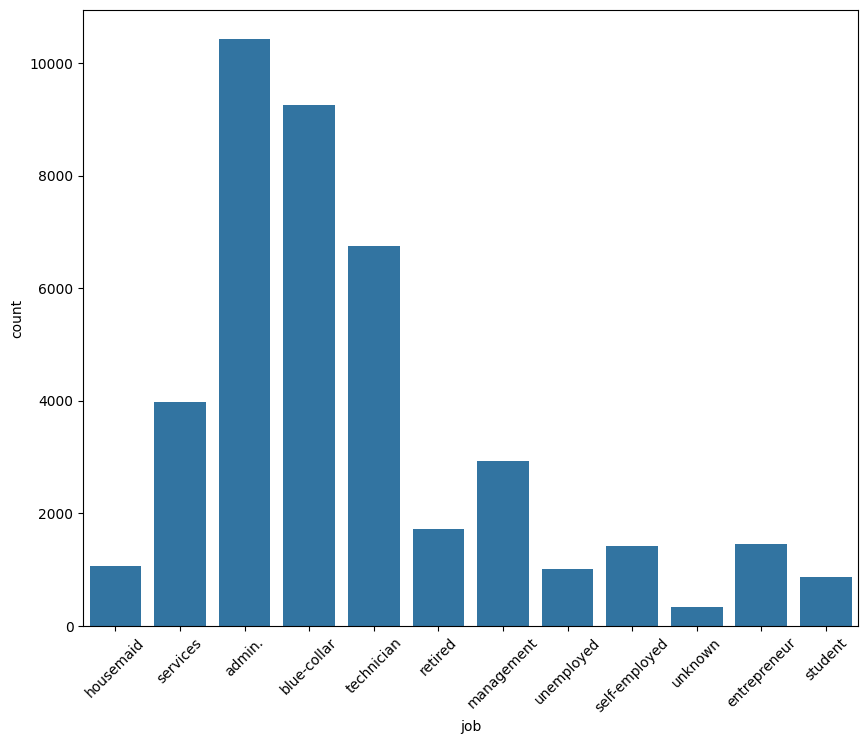

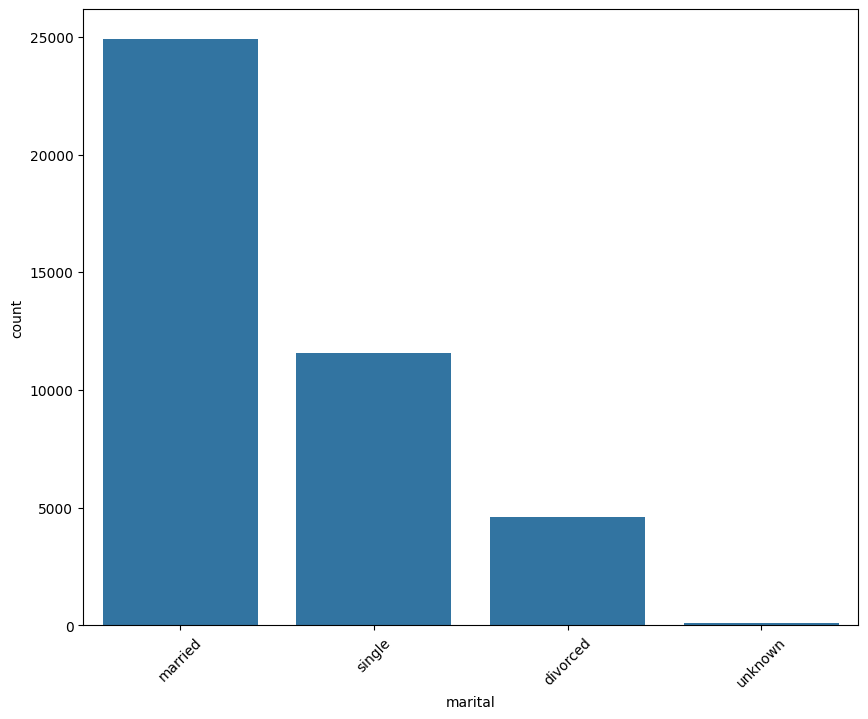

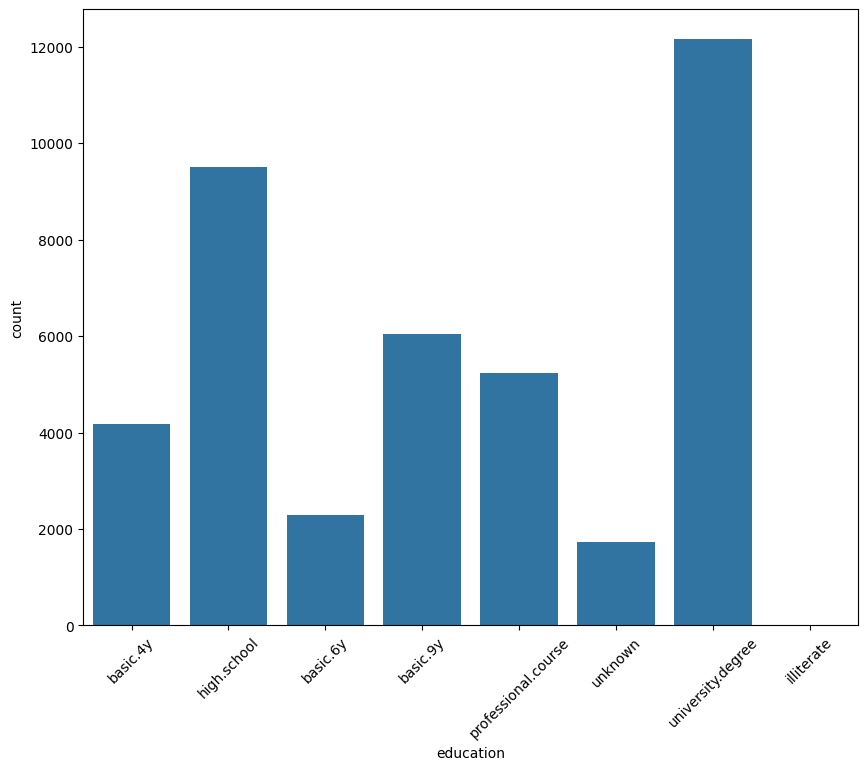

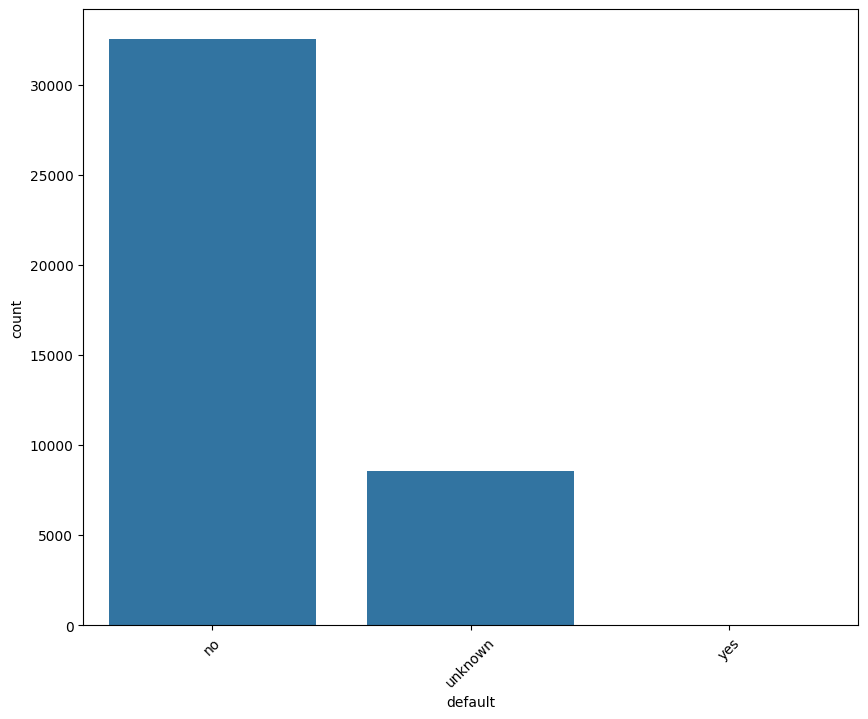

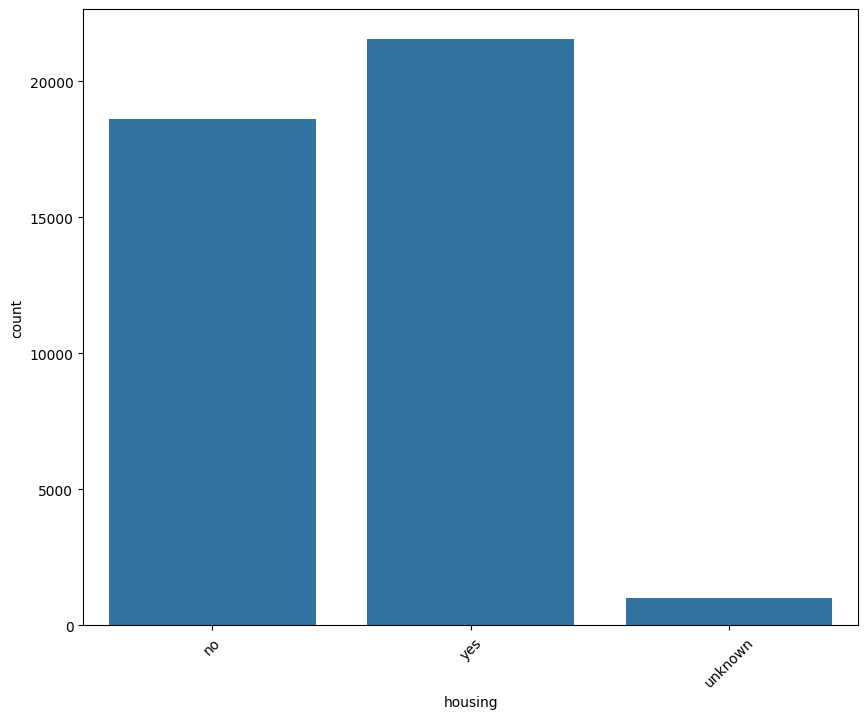

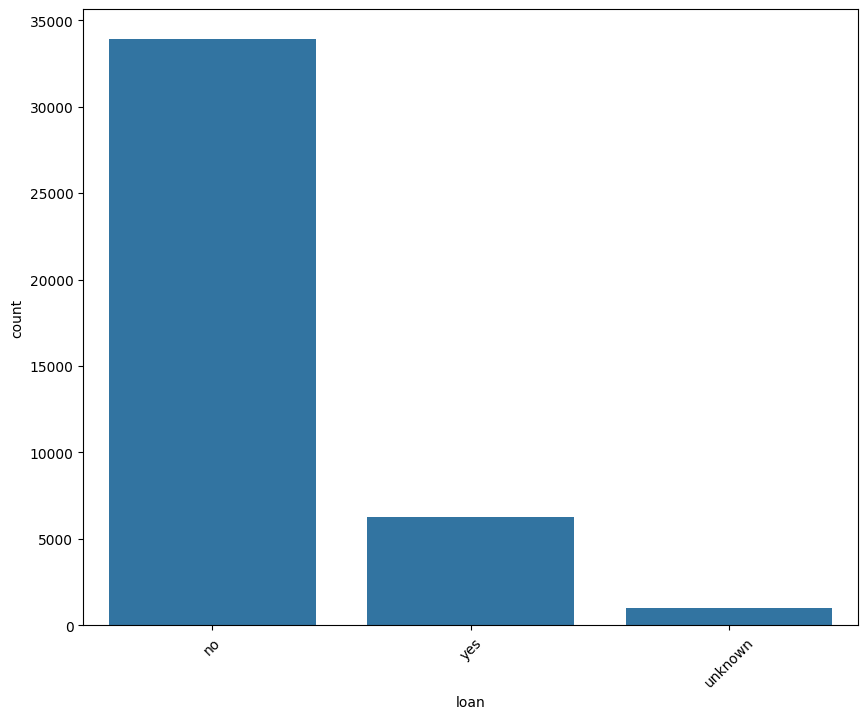

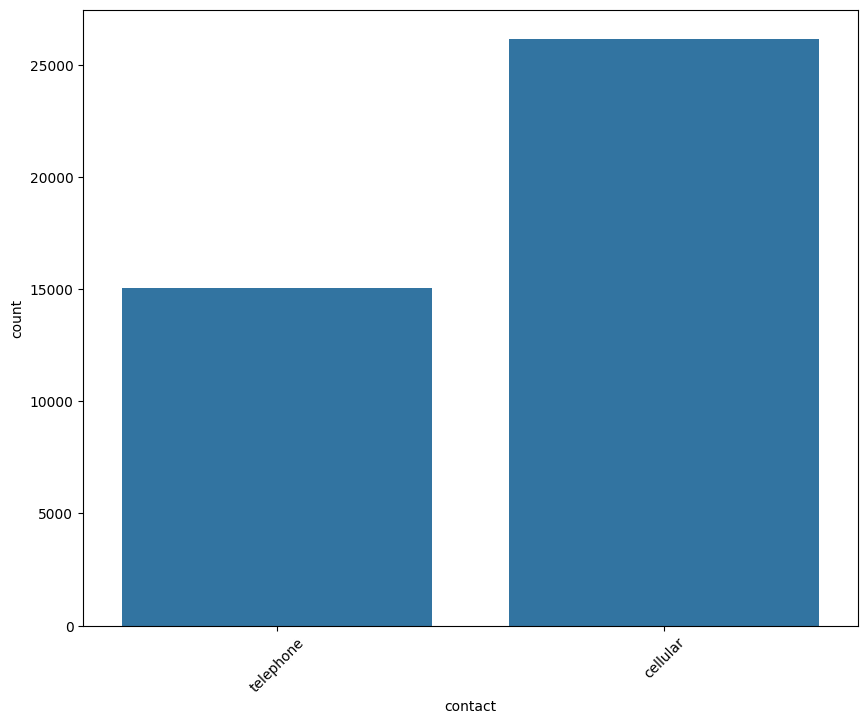

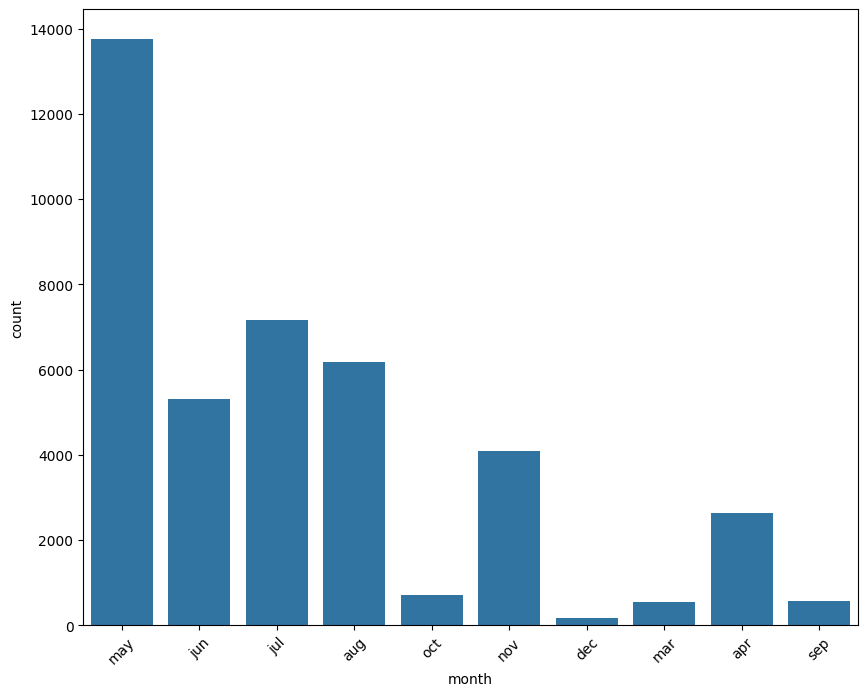

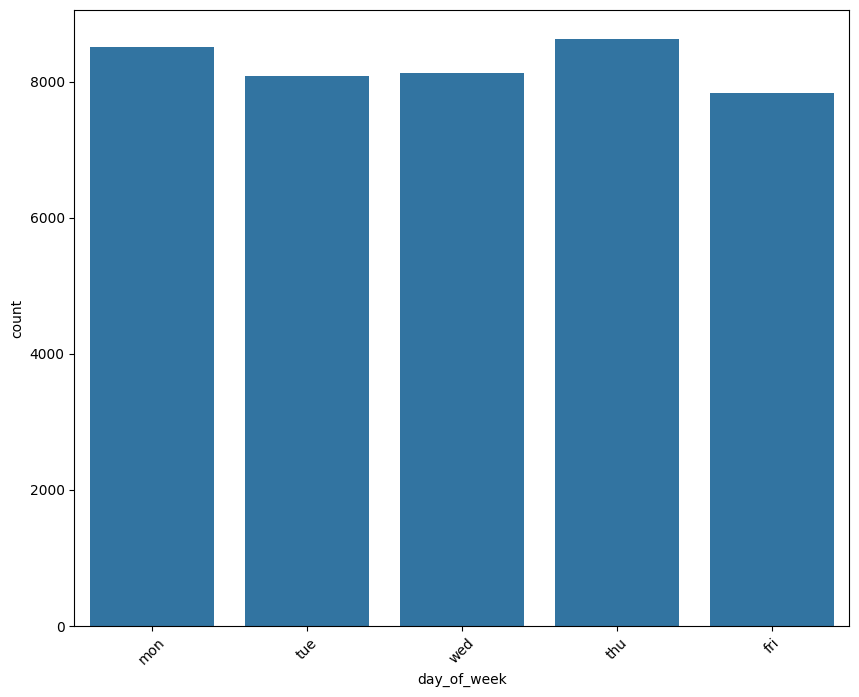

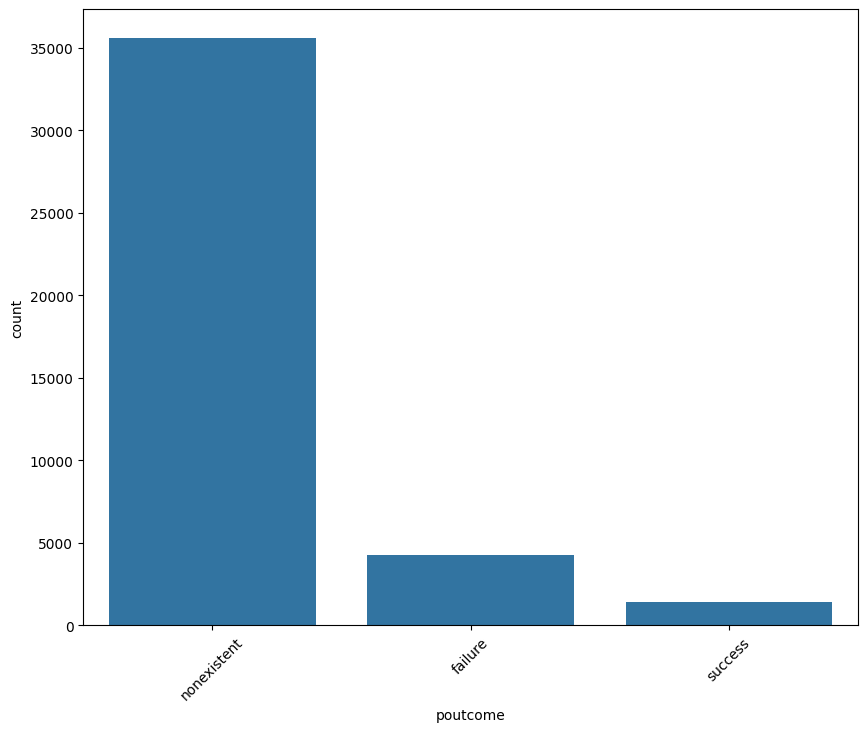

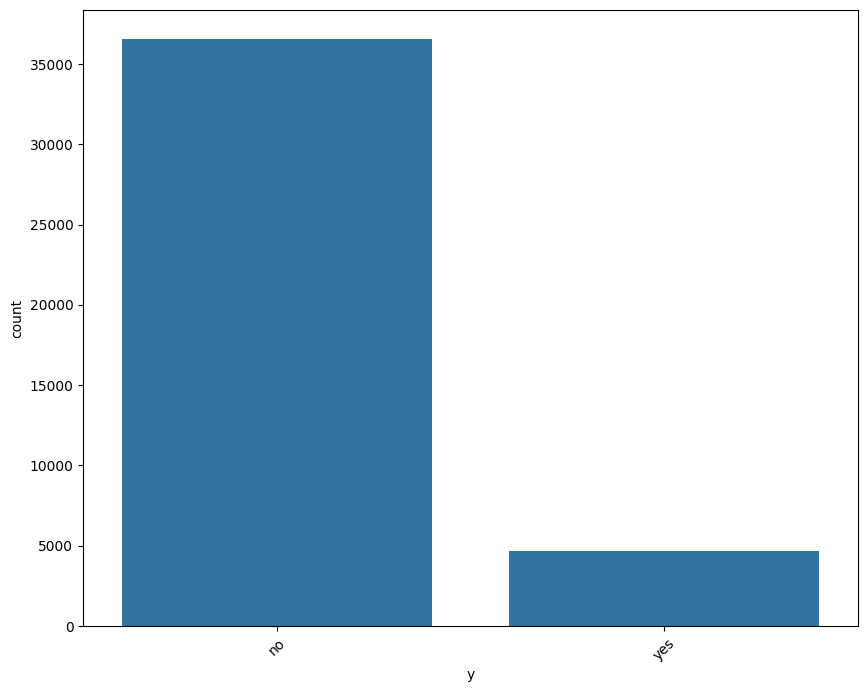

In [283]:
categorical_data = df.select_dtypes(include=['object', 'category'])
for col in categorical_data.columns:
    plt.figure(figsize=(10, 8))
    sns.countplot(data=categorical_data, x=col)
    plt.xticks(rotation=45)
    plt.savefig(f"/Users/nandapop/Documents/Bootcamp/Logistic Regression/machine-learning-python-template/data/data_cat_{col}.png")
    plt.show()


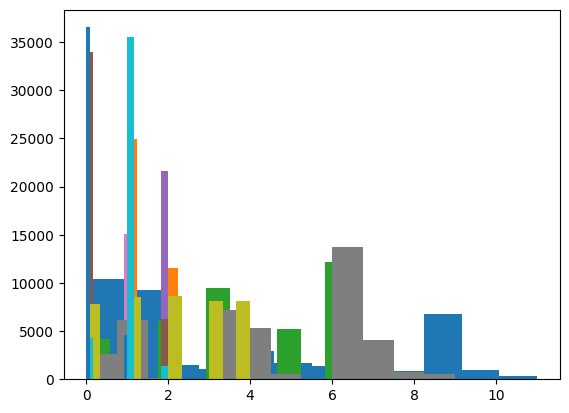

In [288]:
label_encoder = preprocessing.LabelEncoder() 
df_encoder = df.copy()
for col in categorical_data.columns:
    df_encoder[col] = label_encoder.fit_transform(df[col])
    plt.hist(df_encoder[col], bins=12)
plt.savefig("/Users/nandapop/Documents/Bootcamp/Logistic Regression/machine-learning-python-template/data/cat_encoder.png")
plt.show()
    
    

Correlation Numerical and Categorical

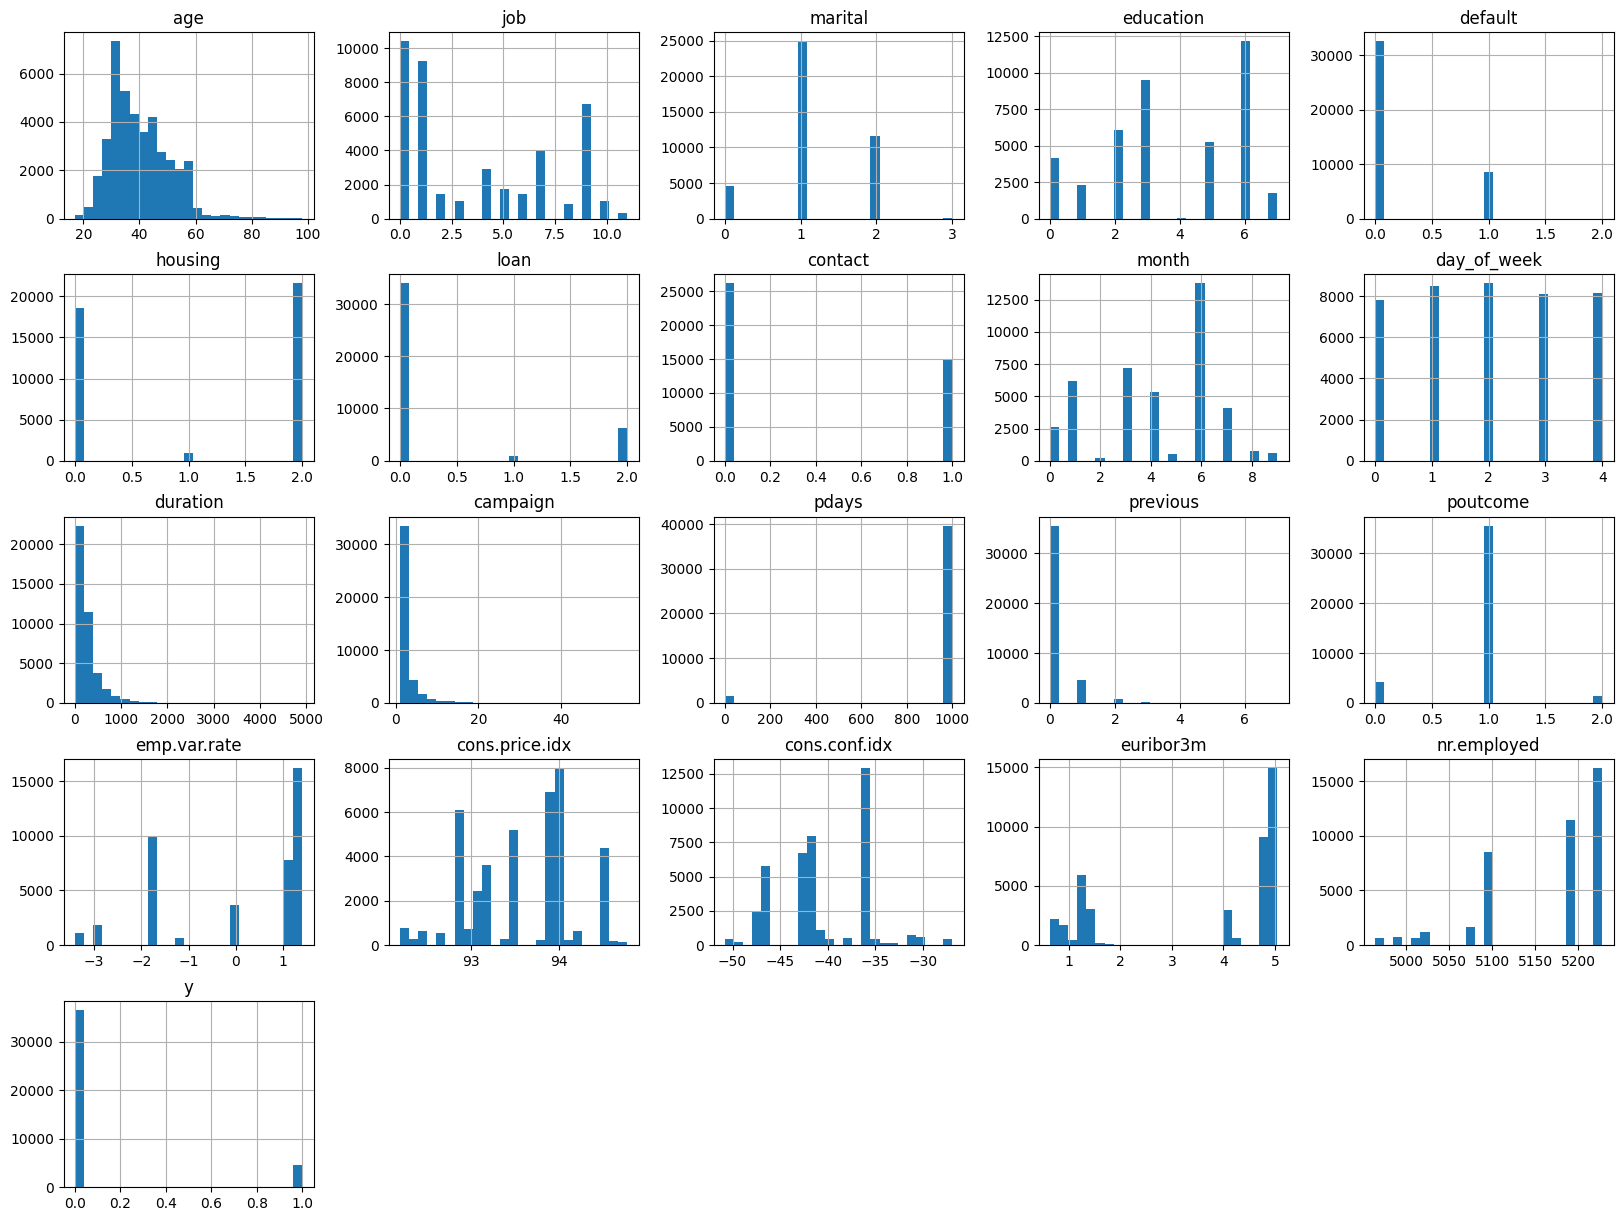

In [289]:
df_encoder.hist(bins=25, figsize=(20, 15))
plt.savefig("/Users/nandapop/Documents/Bootcamp/Logistic Regression/machine-learning-python-template/data/hist_encoder.png")
plt.show()

Target Variable

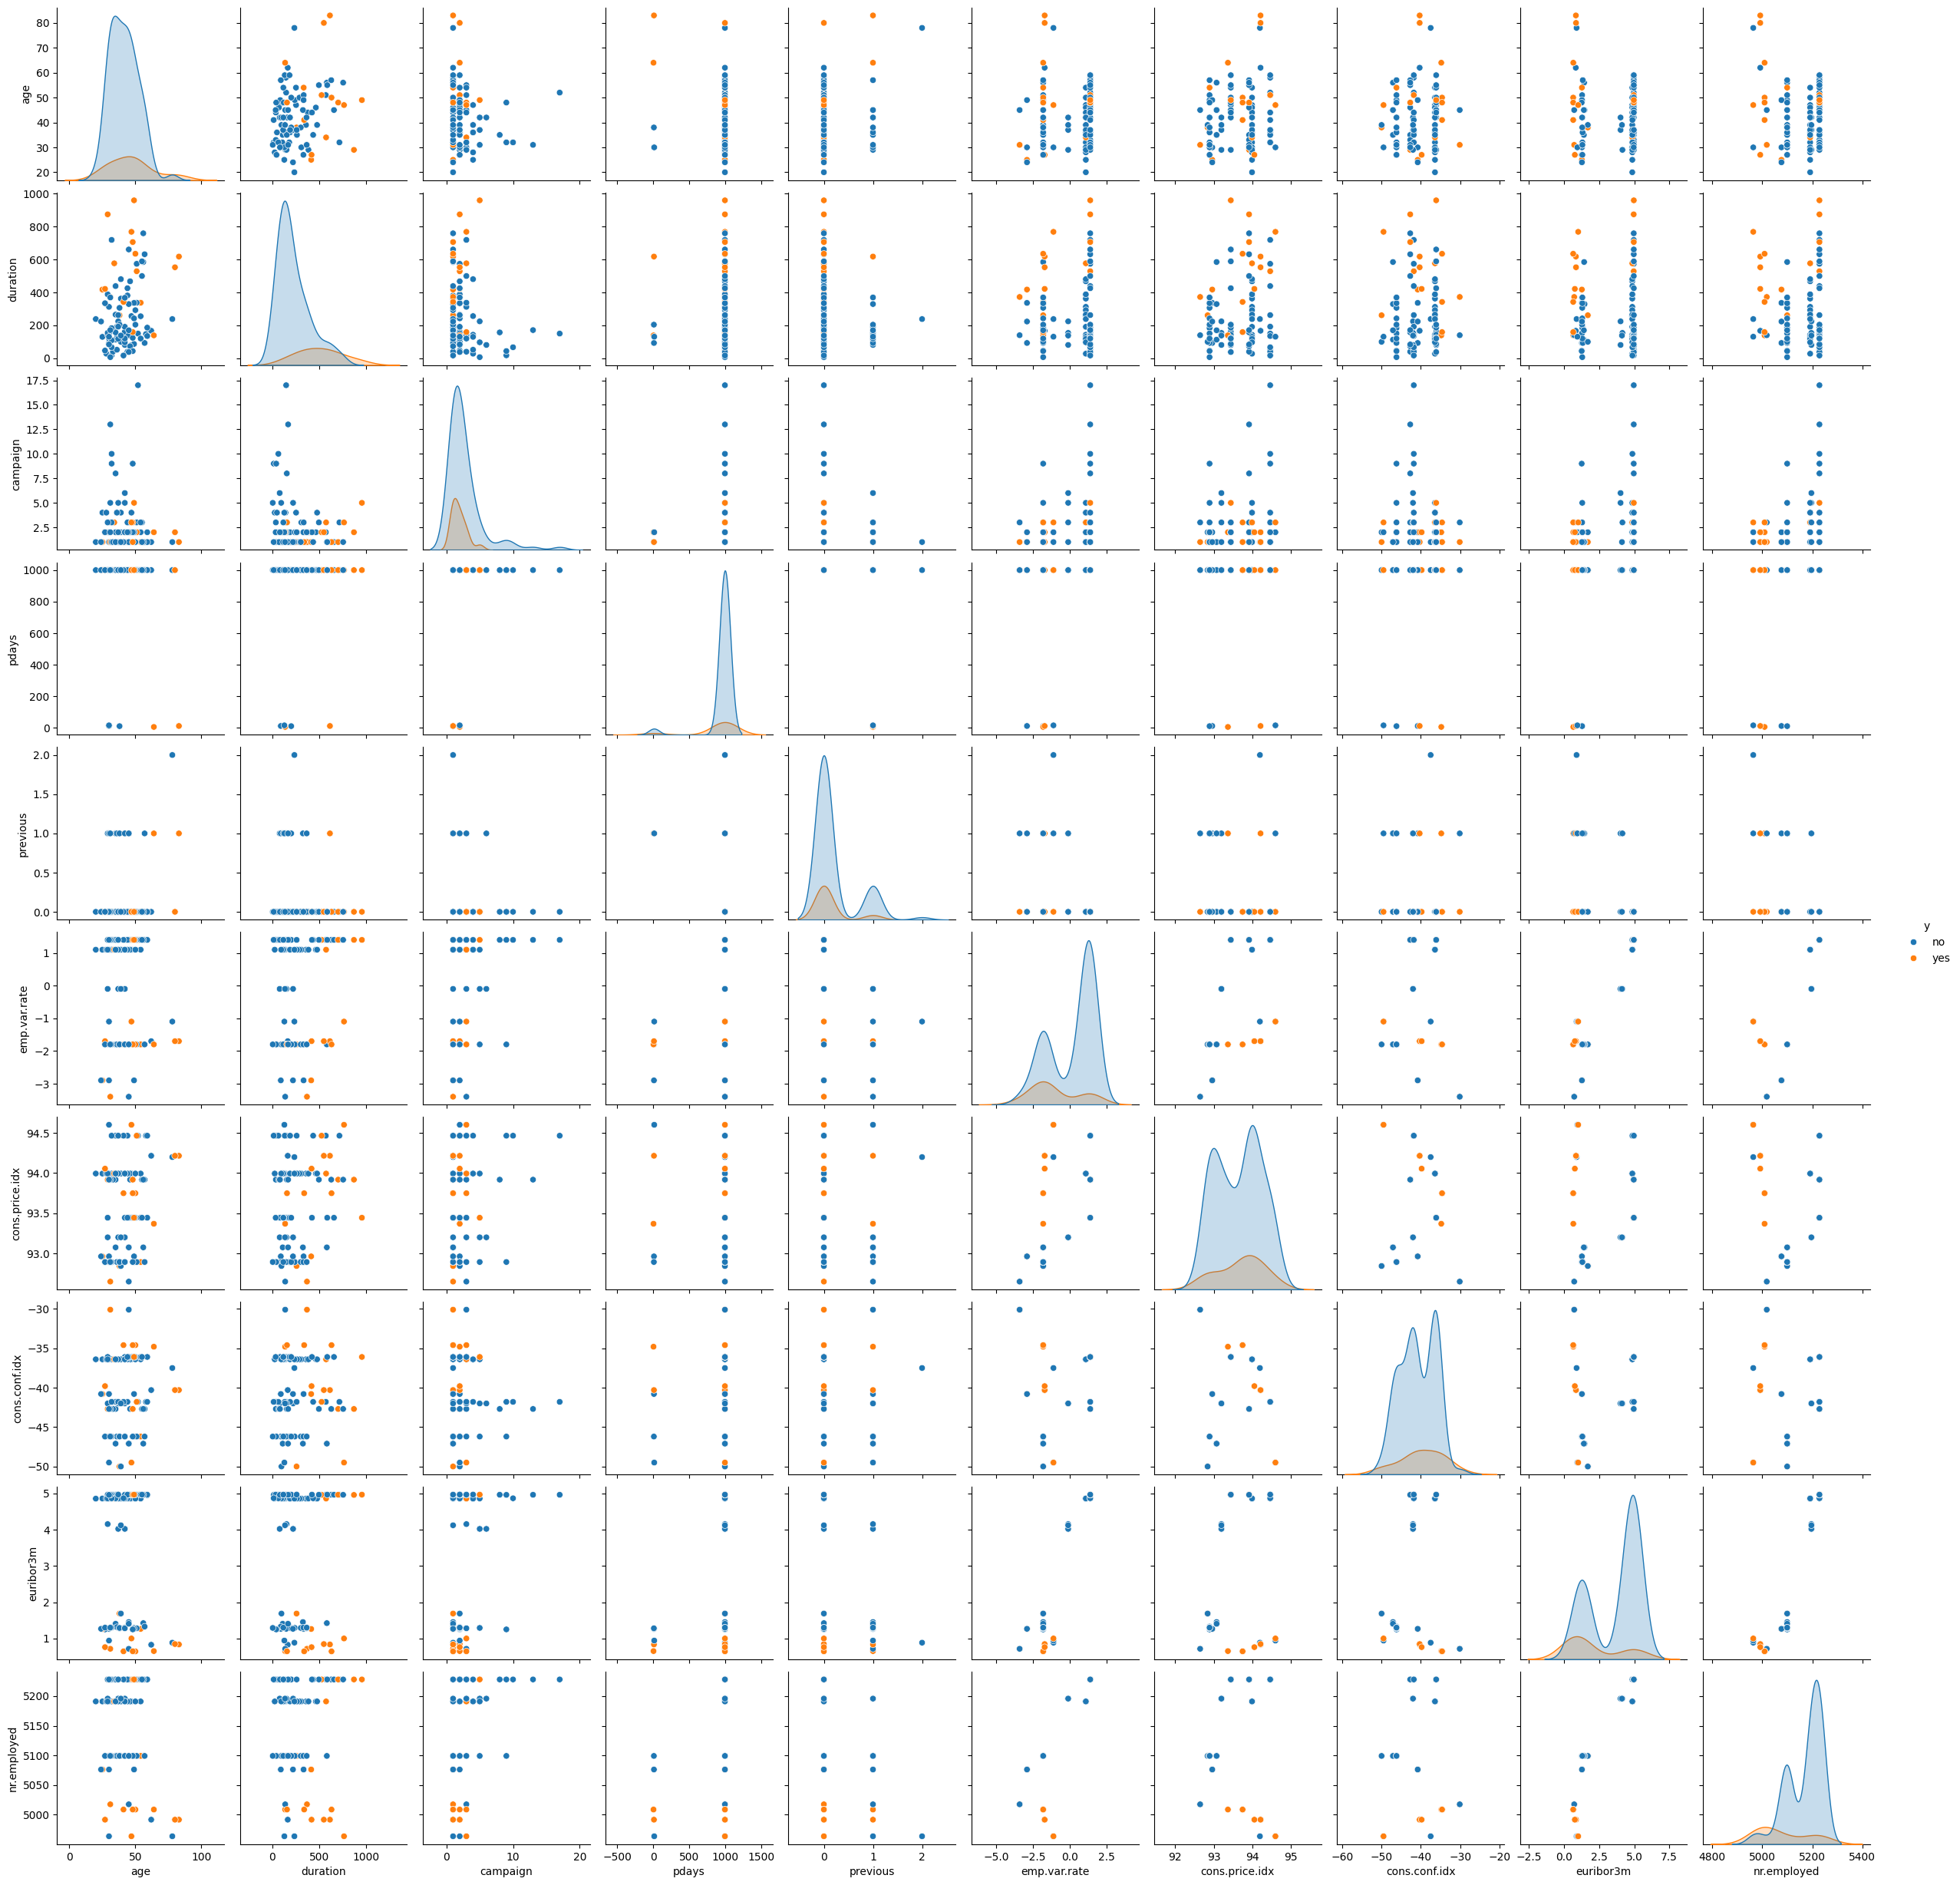

In [290]:
sns.pairplot(df.sample(100),hue = "y")
plt.savefig("/Users/nandapop/Documents/Bootcamp/Logistic Regression/machine-learning-python-template/data/pair_plot_target.png")
plt.show()

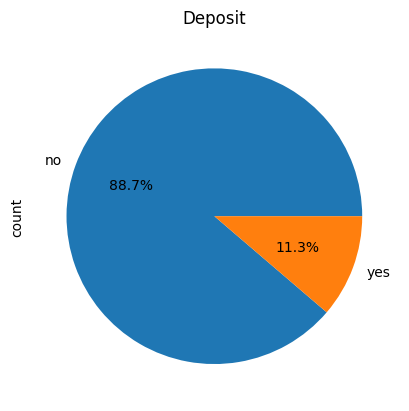

In [291]:
#df.y.value_counts
df["y"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Deposit")
plt.savefig("/Users/nandapop/Documents/Bootcamp/Logistic Regression/machine-learning-python-template/data/plot_pie_deposit.png")
plt.show()


Handling the imbalanced data

Division of the dataset

In [292]:
x = df_encoder.drop("y",axis=1)
y = df_encoder["y"]
# We divide the sample into train and test at 80%
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, train_size = 0.80, stratify=y)
x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
25611,49,1,1,2,1,0,0,0,7,4,227,4,999,0,1,-0.1,93.200,-42.0,4.120,5195.8
26010,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0,-0.1,93.200,-42.0,4.120,5195.8
40194,78,5,1,0,0,0,0,0,3,1,1148,1,999,0,1,-1.7,94.215,-40.3,0.870,4991.6
297,36,0,1,6,0,2,0,1,6,1,120,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0
36344,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1,-2.9,92.963,-40.8,1.262,5076.2


In [293]:
print("X_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (32950, 20)
y_train shape: (32950,)


In [294]:
print("X_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (8238, 20)
y_test shape: (8238,)


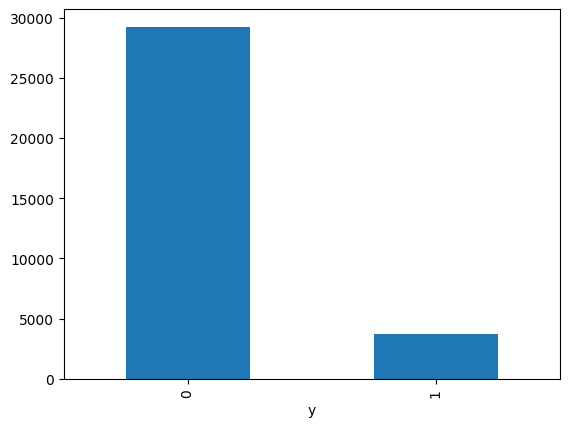

In [296]:
y_train.value_counts().plot.bar()
plt.savefig("/Users/nandapop/Documents/Bootcamp/Logistic Regression/machine-learning-python-template/data/y_train.png")
plt.show()

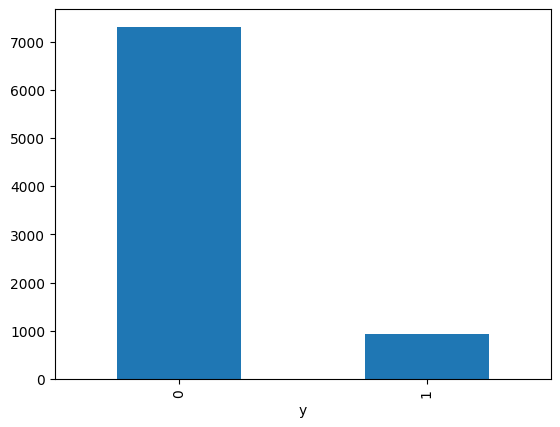

In [297]:
y_test.value_counts().plot.bar()
plt.savefig("/Users/nandapop/Documents/Bootcamp/Logistic Regression/machine-learning-python-template/data/y_test.png")
plt.show()

In [298]:
model = SelectKBest(f_classif, k = 5)
model.fit(x_train, y_train)
ix = model.get_support()
x_train = pd.DataFrame(model.transform(x_train), columns = x_train.columns.values[ix])
x_test = pd.DataFrame(model.transform(x_test), columns = x_test.columns.values[ix])

x_train.head()

,duration,pdays,emp.var.rate,euribor3m,nr.employed
0,227.0,999.0,-0.1,4.120,5195.8
1,202.0,999.0,-0.1,4.120,5195.8
2,1148.0,999.0,-1.7,0.870,4991.6
3,120.0,999.0,1.1,4.857,5191.0
4,368.0,999.0,-2.9,1.262,5076.2


In [299]:
x_train.to_csv("/Users/nandapop/Documents/Bootcamp/Logistic Regression/machine-learning-python-template/data/processed/x_train.csv")
y_train.to_csv("/Users/nandapop/Documents/Bootcamp/Logistic Regression/machine-learning-python-template/data/processed/y_train.csv")
x_test.to_csv("/Users/nandapop/Documents/Bootcamp/Logistic Regression/machine-learning-python-template/data/processed/x_test.csv")
y_test.to_csv("/Users/nandapop/Documents/Bootcamp/Logistic Regression/machine-learning-python-template/data/processed/y_test.csv")

Initialization and training of the model

In [300]:
model = LogisticRegression()
start_time = timeit.default_timer()

print("Training elapsed time ",timeit.default_timer()-start_time)
#Hyperparameter optimization
hyperparams = {
   "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["lbfgs"]
}

Training elapsed time  4.095799522474408e-05


In [301]:
grid = GridSearchCV(model, hyperparams, scoring="accuracy", cv=5)

grid.fit(x_train, y_train)
best_params = grid.best_params_
best_params
best_model = grid.best_estimator_
best_model

LogisticRegression(C=0.1)

Model Prediction

In [302]:
best_model.fit(x_train,y_train)
y_prediction = best_model.predict(x_test)
y_prediction

array([0, 0, 0, ..., 0, 0, 0])

Evaluate predictions

In [303]:
print(accuracy_score(y_test,y_prediction))

0.9092012624423403


In [304]:
print(f1_score(y_test,y_prediction))

0.47983310152990266


In [305]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7310
           1       0.68      0.37      0.48       928

    accuracy                           0.91      8238
   macro avg       0.80      0.67      0.72      8238
weighted avg       0.90      0.91      0.90      8238



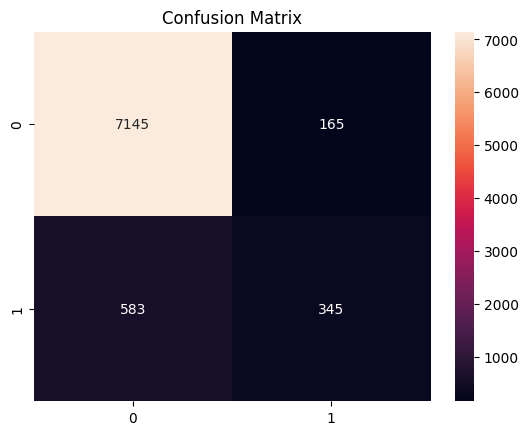

In [306]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.savefig("/Users/nandapop/Documents/Bootcamp/Logistic Regression/machine-learning-python-template/data/confusion_matrix.png")
plt.show()

In [307]:
confusion_matrix(y_test, y_prediction)

array([[7145,  165],
       [ 583,  345]])

Hyperparameter optimization